In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

data_dir = '/Users/SY/Desktop/obic/data/'
#data_dir = '/Users/dengdingshan/Documents/data/obic/New/'

# Nov28 2018 研究GAIA BP-RP图中sfd异常点

In [24]:
starcatalog_fram = pd.read_csv(data_dir + 'LMOB-V4-SFDGP-panstar.csv') 

In [28]:
starcatalog_fram_fil=starcatalog_fram[((starcatalog_fram['SFD_ebv']<0.05)&\
                                       (starcatalog_fram['GBP']-starcatalog_fram['GRP']>=0.1))]

df = starcatalog_fram_fil

compare = starcatalog_fram[((starcatalog_fram['SFD_ebv']<0.05)&\
                           (starcatalog_fram['GBP']-starcatalog_fram['GRP']<=0.1))]

In [23]:
# starcatalog_fram_fil
# starcatalog_fram_fil.to_csv(data_dir + 'LMOB-V4-SFDGP-SFDright.csv',columns = ['TEFF','ERR_TEFF','RA','DEC','LOGG','ERR_LOGG','FEH','ERR_FEH',\
#                                         'SFD_ebv','l','b','J', 'ERR_J', 'H', 'ERR_H', 'KS', 'ERR_KS', 'W1', 'ERR_W1', \
#                                         'W2','ERR_W2','GMAG','GBP','GRP'])

In [16]:
# df = starcatalog_fram_fil

# tag = 'J'
# mark = 'W2'

# plt.figure()

# plt.scatter(starcatalog_fram['TEFF'],starcatalog_fram[tag],s=2)
# plt.scatter(compare['TEFF'],compare[tag],s=5,c='orange')
# plt.scatter(df['TEFF'],df[tag],s=5,c='red')

# plt.title(tag)

# # plt.ylim(2,5)

In [29]:
### figures & Savename
tag = 'gmag'
mark = 'imag'

save = data_dir + 'pictures/'
# save = '/Users/SY/Desktop/obic/picture/'

i = datetime.datetime.now()
date_now = "%s_%s_%s_" % (i.year, i.month, i.day) 
ylabel = '$%s - %s$'%(tag,mark) 
savename1 = save + date_now + tag + mark + 'LMOB'+'FEH'+'>'+'0'+'.png'
savename2 = save + date_now + tag + mark + 'LMOB'+'sfderror'+'.png'
savename3 = save + date_now + 'errteff.png'



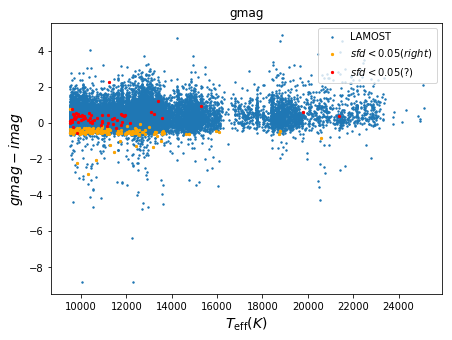

In [30]:
#print(starcatalog_fram[tag]-starcatalog_fram[mark])

plt.figure(3,figsize=(7, 5))


plt.scatter(starcatalog_fram['TEFF'],starcatalog_fram[tag]-starcatalog_fram[mark],s=2,label='LAMOST')
plt.scatter(compare['TEFF'],compare[tag]-compare[mark],s=5,c='orange',label='$sfd<0.05(right)$')
plt.scatter(df['TEFF'],df[tag]-df[mark],s=5,c='red',label='$sfd<0.05(?)$')

plt.title(tag)
plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.legend(loc='upper right')
#plt.ylim(-0.4,1)
plt.savefig(savename2,dpi=200)

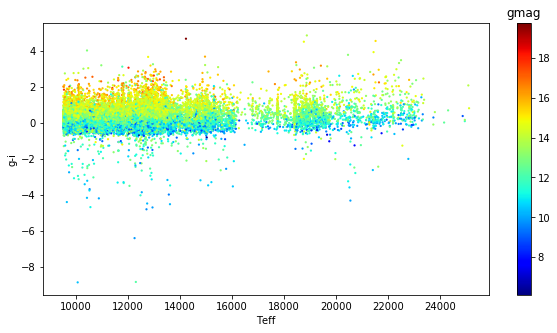

In [36]:
testpart = 'gmag'
plt.figure(figsize=(10,5))
plt.xlabel('Teff')
plt.ylabel('g-i')

cm = plt.cm.get_cmap('jet')

sc = plt.scatter(starcatalog_fram['TEFF'],starcatalog_fram[tag]-starcatalog_fram[mark],\
            c = starcatalog_fram[testpart],s=5,edgecolors = 'None',cmap=cm)

clb = plt.colorbar(sc)
clb.ax.set_title(testpart)

plt.show()


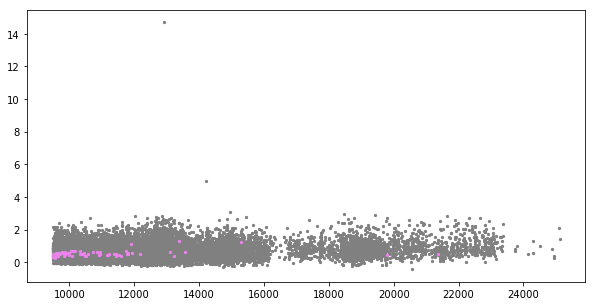

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(starcatalog_fram['TEFF'],starcatalog_fram['GBP']-starcatalog_fram['GRP'],c='grey',s=5)
plt.scatter(starcatalog_fram_fil['TEFF'],\
            starcatalog_fram_fil['GBP']-starcatalog_fram_fil['GRP'],c='violet',s=5)
plt.show()

# Nov27 2018 研究gmag到底哪里出了问题

In [83]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'LMOB-V4-SDSS.csv')
df = starcatalog_fram

In [84]:
df['m_SDSS12'].loc[df['m_SDSS12'] == '*'] = 1
df['m_SDSS12'] = df['m_SDSS12'].fillna(0)

/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [85]:
df['q_mode'].loc[df['q_mode'] == '+'] = 1
df['q_mode'] = df['q_mode'].fillna(0)

/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


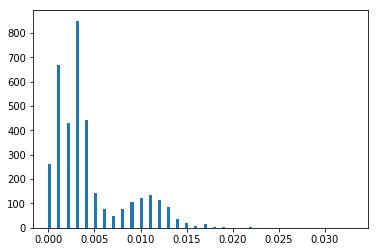

In [77]:
a = df['e_gmag']
plt.hist(a,100)
plt.savefig(data_dir+'test.png')

In [89]:
df = df[df['q_mode'] == 1]
len(df)

577

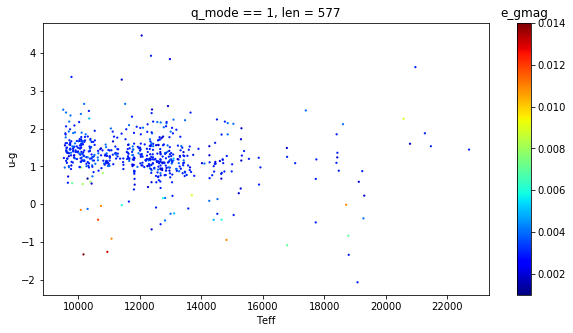

In [90]:
testpart = 'e_gmag'
plt.figure(figsize=(10,5))
plt.xlabel('Teff')
plt.ylabel('u-g')

cm = plt.cm.get_cmap('jet')

sc = plt.scatter(df['TEFF'],df['umag']-df['gmag_x'],\
            c = df[testpart],s=5,edgecolors = 'None',cmap=cm)

clb = plt.colorbar(sc)
clb.ax.set_title(testpart)

# plt.scatter(starcatalog_fram[teff],starcatalog_fram[err_teff],\
#             c='red',s=5, edgecolors='None', alpha=0.5)

plt.title('q_mode == 1, len = 577')
# plt.legend()
plt.savefig(data_dir+'test.png',dpi = 500)
plt.show()

# 0812研究galex到底10000K左右的位置出现了什么问题

In [5]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'LMOB-V4-SDSS.csv')

In [6]:
df = starcatalog_fram

In [121]:
df=df[(df['fuv_magerr'] <=0.2)]
df=df[(df['fuv_mag'] >=14)]

In [122]:
df_nice = df[df['fuv_mag'].notnull()]

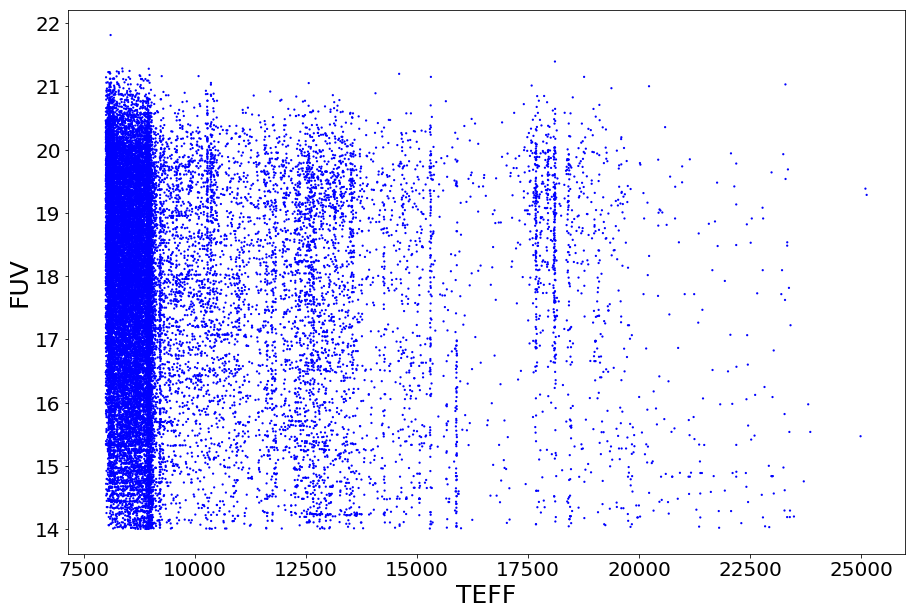

In [123]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('FUV',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# cm = plt.cm.get_cmap('gray')

# sc = plt.scatter(df['RA'],df['DEC'],\
#             c = 'red',s=3,edgecolors = 'None',cmap=cm,label = 'E(B-V) >= 0.05')

# clb = plt.colorbar(sc)
# clb.ax.set_title('SFD_ebv')

plt.scatter(df_nice['TEFF'],df_nice['fuv_mag'],\
           c = 'blue',s = 5, edgecolors = 'None')

# plt.scatter(starcatalog_fram[teff],starcatalog_fram[err_teff],\
#             c='red',s=5, edgecolors='None', alpha=0.5)

# plt.legend()
plt.savefig(data_dir+'pictures/'+'FUV_0818_all.png',dpi = 200)
plt.show()

# 0812研究只和sdss交叉的具体的分布情况

In [124]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_0812.csv')

In [125]:
df = starcatalog_fram

In [126]:
df=df[(df['e_gmag'] <=0.05)]
df=df[(df['gmag'] >=14)]

In [127]:
df.columns

Index(['col1', 'Unnamed: 0', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG',
       'ERR_LOGG', 'FEH', 'ERR_FEH', 'SFD_ebv', 'RAdeg', 'DEdeg', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'objID', 'mode', 'q_mode', 'class', 'SDSS12',
       'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp',
       'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
       'SpObjID', 'spType', 'spCl', 'subClass', 'angDist'],
      dtype='object')

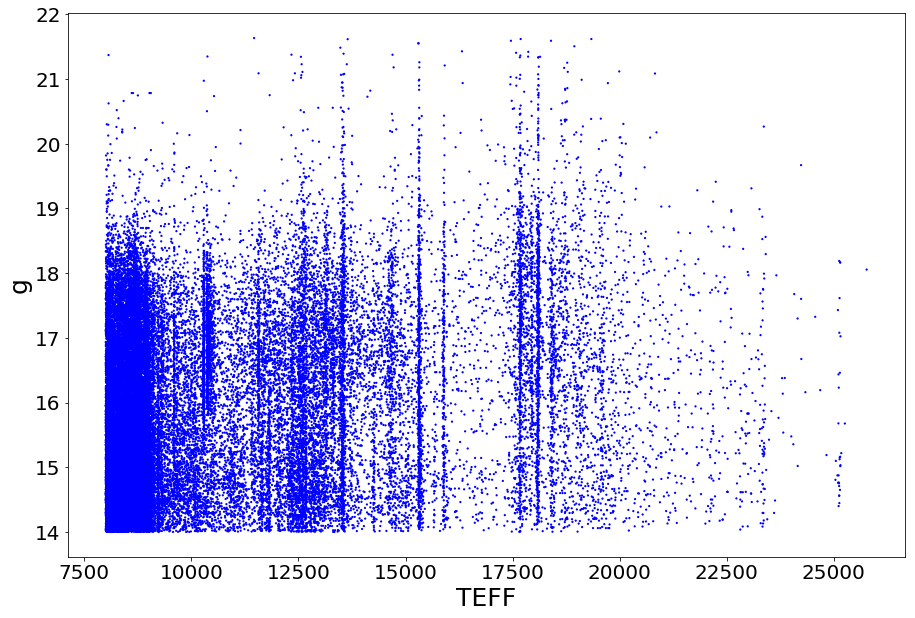

In [128]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('g',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(df['TEFF'],df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'g_0812_all.png',dpi = 200)
plt.show()

# 0812研究FUV-g具体的情况

In [136]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_galex_0812.csv')

In [137]:
df = starcatalog_fram

In [138]:
df=df[((df['fuv_magerr'] <=0.2) &(df['e_gmag'] <=0.05))]
df=df[((df['gmag'] >=14)&(df['fuv_mag'] >=14))]

In [139]:
df.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags',
       'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag',
       'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph',
       'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'SpObjID',
       'spType', 'spCl', 'subClass', 'angDist', 'ra_x', 'dec_x', 'fuv_mag',
       'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'objid_x', 'E_bv', 'objtype',
       'fuv_flux', 'fuv_fluxerr', 'nuv_flux', 'nuv_fluxerr', 'fuv_artifact',
       'nuv_artifact', 'angDist_x'],
      dtype='object')

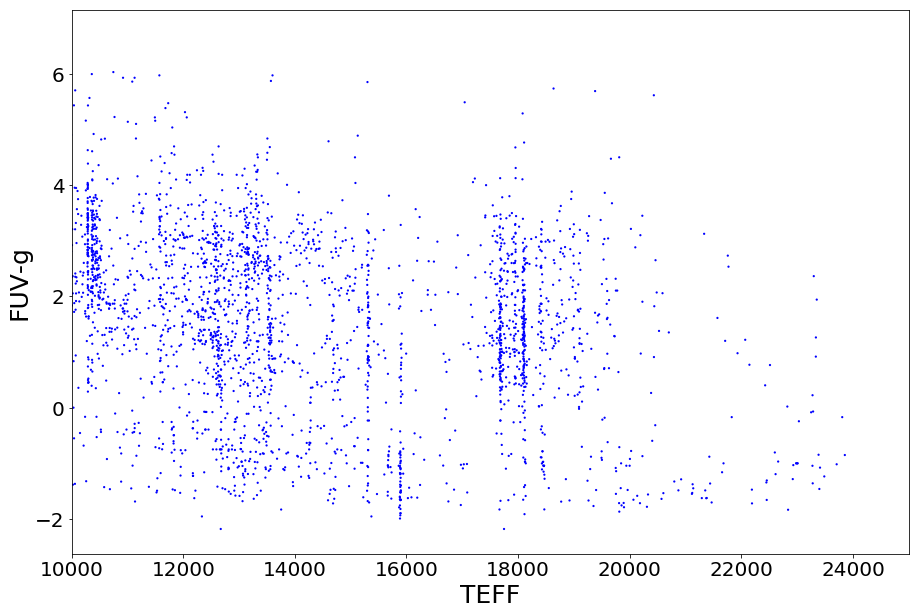

In [135]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF',fontsize=25)
plt.ylabel('FUV-g',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([10000,25000])
plt.scatter(df['TEFF_1'],df['fuv_mag']-df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'FUV_g_0818_all.png',dpi = 200)
plt.show()

# 0812研究new2的异常

In [185]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_sdss_galex_new2.csv')

In [217]:
df = starcatalog_fram

In [218]:
df=df[((df['fuv_magerr'] <=0.2)&(df['e_gmag'] <=0.05))]
df=df[((df['gmag'] >14)&(df['fuv_mag'] >14))]

In [219]:
df=df[(df['FEH']<0)]

In [220]:
df.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng',
       'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags',
       'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag',
       'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph',
       'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'SpObjID',
       'spType', 'spCl', 'subClass', 'angDist', 'ra_x', 'dec_x', 'fuv_mag',
       'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'objid_x', 'E_bv', 'objtype',
       'fuv_flux', 'fuv_fluxerr', 'nuv_flux', 'nuv_fluxerr', 'fuv_artifact',
       'nuv_artifact', 'angDist_x'],
      dtype='object')

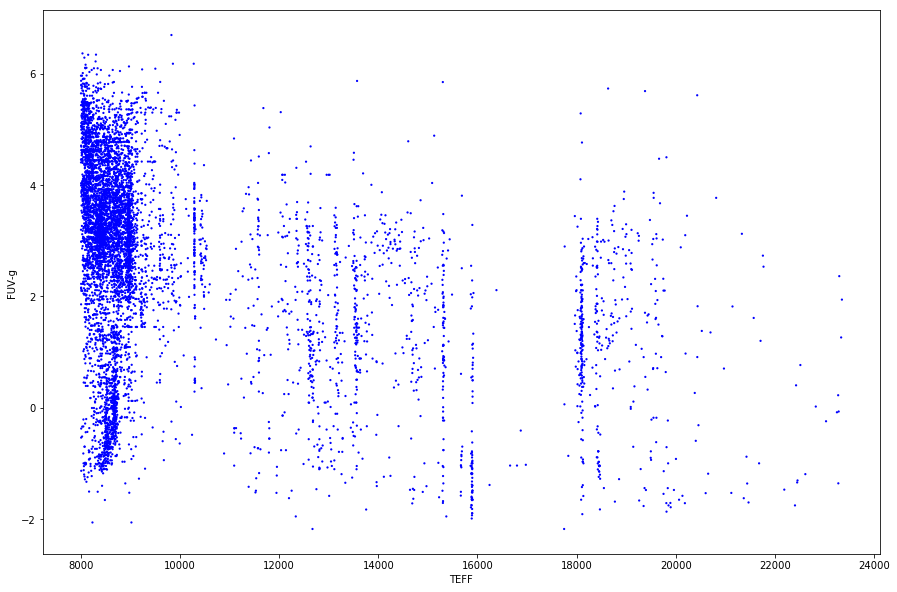

In [221]:
plt.figure(figsize=(15,10))
plt.xlabel('TEFF')
plt.ylabel('FUV-g')

plt.scatter(df['TEFF'],df['fuv_mag']-df['gmag'],\
           c = 'blue',s = 5, edgecolors = 'None')

plt.savefig(data_dir+'pictures/'+'FUV_g_0818_all_fehmin_new2.png',dpi = 200)
plt.show()

# Others

In [15]:
import astropy.coordinates as coord
import astropy.units as u

In [16]:
c1 = coord.ICRS(ra=89.014303*u.degree, dec=13.924912*u.degree)
gc1 = c1.transform_to(coord.Galactic)

In [17]:
l = []; b = [];
for j in range(len(df)):
    c1 = coord.ICRS(ra = df['RA'].values[j]*u.degree, dec = df['DEC'].values[j]*u.degree)
    gc1 = c1.transform_to(coord.Galactic)
    l.append(gc1.l.value)
    b.append(gc1.b.value)


In [18]:
df['l'] = np.array(l)
df['b'] = np.array(b)

/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
center_count = len([i for i in b if abs(i)<10])
center_count

1728

In [21]:
len(b)

4950

In [22]:
df_nice = df[df['SFD_ebv'] < 0.05]

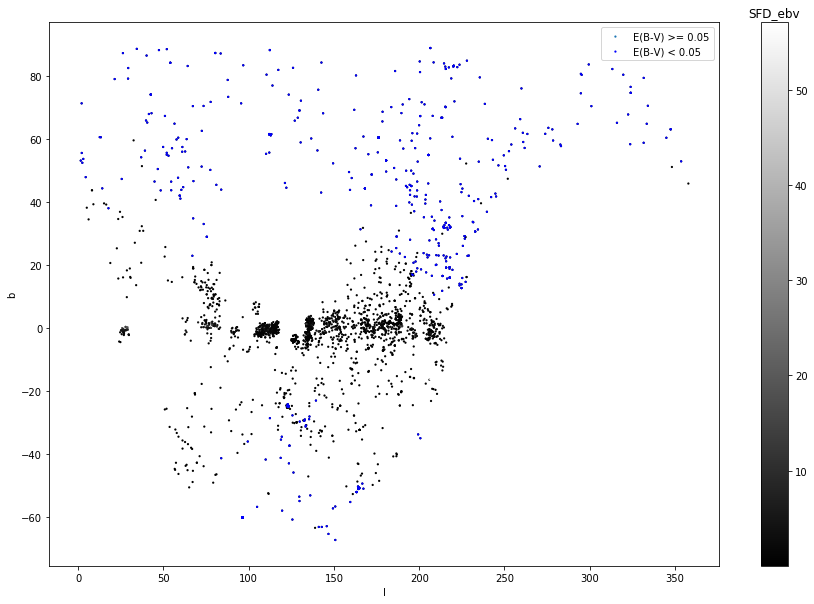

In [26]:
plt.figure(figsize=(15,10))
plt.xlabel('l')
plt.ylabel('b')

cm = plt.cm.get_cmap('gray')

sc = plt.scatter(df['l'],df['b'],\
            c = df['SFD_ebv'],s=5,edgecolors = 'None',cmap=cm,label = 'E(B-V) >= 0.05')

clb = plt.colorbar(sc)
clb.ax.set_title('SFD_ebv')

plt.scatter(df_nice['l'],df_nice['b'],\
           c = 'blue',s = 5, edgecolors = 'None',label = 'E(B-V) < 0.05')

# plt.scatter(starcatalog_fram[teff],starcatalog_fram[err_teff],\
#             c='red',s=5, edgecolors='None', alpha=0.5)

plt.legend()
plt.savefig('20000K_Galactic.png',dpi = 200)
plt.show()